In [1]:
import zipfile
import os

zip_path = 'project_data.zip'
extract_dir = 'project_data'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print("Unzipped to:", extract_dir)


Unzipped to: project_data


In [3]:
class_dirs = os.listdir(extract_dir)
print("Classes:", class_dirs)

Classes: ['backpack', 'book', 'calculator', 'chair', 'clock', 'desk', 'keychain', 'laptop', 'paper', 'pen', 'phone', 'water bottle']


In [13]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torch.utils.data import random_split

# https://pytorch.org/vision/main/transforms.html

transform = transforms.Compose([
    transforms.Resize((128, 128)),   # Resize images to 128x128
    transforms.RandomRotation(15),
    transforms.RandomHorizontalFlip(p=0.1),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

dataset = datasets.ImageFolder(root=extract_dir, transform=transform)
dataSize = len(dataset)

# https://pytorch.org/docs/stable/data.html
trainSize = int(0.8 * dataSize)
valSize = int(0.1 * dataSize)
testSize = dataSize - trainSize - valSize
train_dataset, val_dataset, test_dataset = random_split(
    dataset,
    [trainSize, valSize, testSize]
)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader   = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader  = DataLoader(test_dataset, batch_size=32, shuffle=False)

images, labels = next(iter(train_loader))

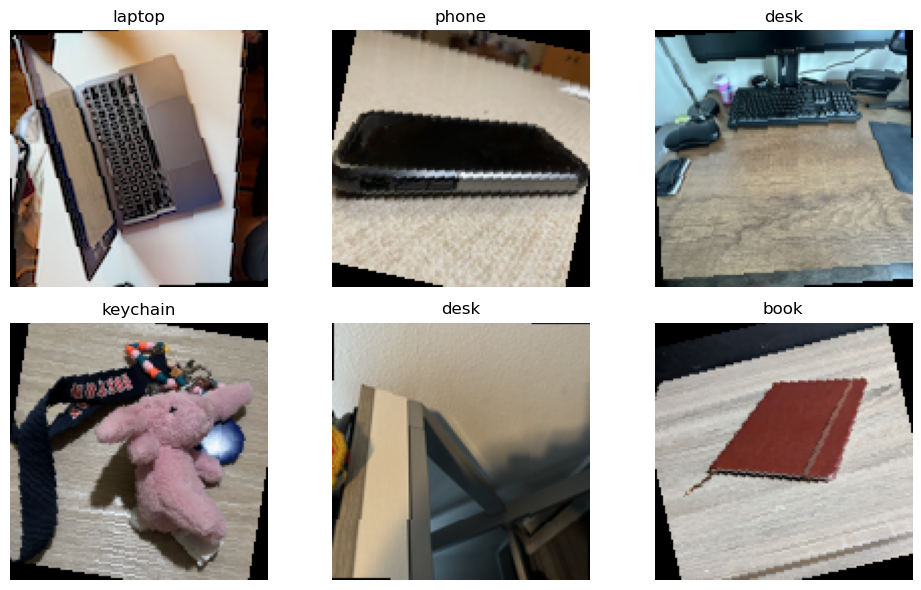

In [15]:
import matplotlib.pyplot as plt
import torchvision

class_names = dataset.classes
data_iter = iter(train_loader)
images, labels = next(data_iter)

# Show 6 images
fig, axes = plt.subplots(2, 3, figsize=(10, 6))
for i in range(6):
    ax = axes[i // 3, i % 3]
    img = images[i].permute(1, 2, 0)
    img = img * 0.5 + 0.5
    ax.imshow(img)
    ax.set_title(class_names[labels[i]])
    ax.axis('off')

plt.tight_layout()
plt.show()


In [79]:
import torch.nn as nn
import torch.nn.functional as F

# https://www.youtube.com/watch?v=aO9naT4IFKI

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.cnn_model = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, padding=1),
            # https://pytorch.org/docs/stable/generated/torch.nn.BatchNorm2d.html
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2, 2)
        )

        self.fc_model = nn.Sequential(
            nn.Linear(in_features=64*16*16, out_features=128),
            nn.ReLU(),
            nn.Linear(in_features=128, out_features=64),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(in_features=64, out_features=12)
        )

    def forward(self, x):
        x = self.cnn_model(x)
        x = x.view(x.size(0), -1) # flattens arrays
        x = self.fc_model(x)

        return x
            


In [81]:
model = CNN()

In [83]:
model

CNN(
  (cnn_model): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU()
    (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc_model): Sequential(
    (0): Linear(in_features=16384, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    

In [85]:
import torch

# Check if GPU is available with CUDA
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f'Training and inference with device: {device}')

model.to(device)  # Move model to GPU

Training and inference with device: cpu


CNN(
  (cnn_model): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU()
    (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc_model): Sequential(
    (0): Linear(in_features=16384, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    

In [87]:
import torch.optim as optim

# excercise 8
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

# https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html
num_epochs = 20
patience = 3
best_val_acc = 0
patience_counter = 0

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad() # zero the parameter gradients
        outputs = model(images)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_acc = 100 * correct / total
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss:.2f}, Training Accuracy: {train_acc:.2f}%")

    valCorrect = 0
    valTotal = 0
    
    with torch.no_grad():
        for valImages, valLabels in val_loader:
            valImages, valLabels = valImages.to(device), valLabels.to(device)
            valOutputs = model(valImages)
            _, valPredicted = torch.max(valOutputs.data, 1)
            valTotal += valLabels.size(0)
            valCorrect += (valPredicted == valLabels).sum().item()
    val_acc = 100 * valCorrect / valTotal
    print(f'Validation Accuracy: {100 * valCorrect / valTotal:.2f}%')


    if val_acc > best_val_acc:
        best_val_acc = val_acc
        patience_counter = 0
        # Save best model
        torch.save(model.state_dict(), 'best_model.pt')
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print(f"Early stopping triggered at epoch {epoch+1}")
            break

Epoch 1/20, Loss: 278.50, Training Accuracy: 21.02%
Validation Accuracy: 29.89%
Epoch 2/20, Loss: 241.52, Training Accuracy: 31.01%
Validation Accuracy: 35.58%
Epoch 3/20, Loss: 222.29, Training Accuracy: 36.29%
Validation Accuracy: 36.21%
Epoch 4/20, Loss: 208.51, Training Accuracy: 41.24%
Validation Accuracy: 41.47%
Epoch 5/20, Loss: 196.04, Training Accuracy: 44.89%
Validation Accuracy: 41.05%
Epoch 6/20, Loss: 182.38, Training Accuracy: 48.46%
Validation Accuracy: 44.63%
Epoch 7/20, Loss: 168.52, Training Accuracy: 53.11%
Validation Accuracy: 47.16%
Epoch 8/20, Loss: 160.19, Training Accuracy: 55.30%
Validation Accuracy: 50.53%
Epoch 9/20, Loss: 148.22, Training Accuracy: 58.92%
Validation Accuracy: 47.79%
Epoch 10/20, Loss: 142.26, Training Accuracy: 60.18%
Validation Accuracy: 49.68%
Epoch 11/20, Loss: 135.93, Training Accuracy: 62.55%
Validation Accuracy: 49.47%
Early stopping triggered at epoch 11


In [89]:
'''
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in val_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Validation Accuracy: {100 * correct / total:.2f}%')
'''


"\nmodel.eval()\ncorrect = 0\ntotal = 0\n\nwith torch.no_grad():\n    for images, labels in val_loader:\n        images, labels = images.to(device), labels.to(device)\n        outputs = model(images)\n        _, predicted = torch.max(outputs.data, 1)\n        total += labels.size(0)\n        correct += (predicted == labels).sum().item()\n\nprint(f'Validation Accuracy: {100 * correct / total:.2f}%')\n"

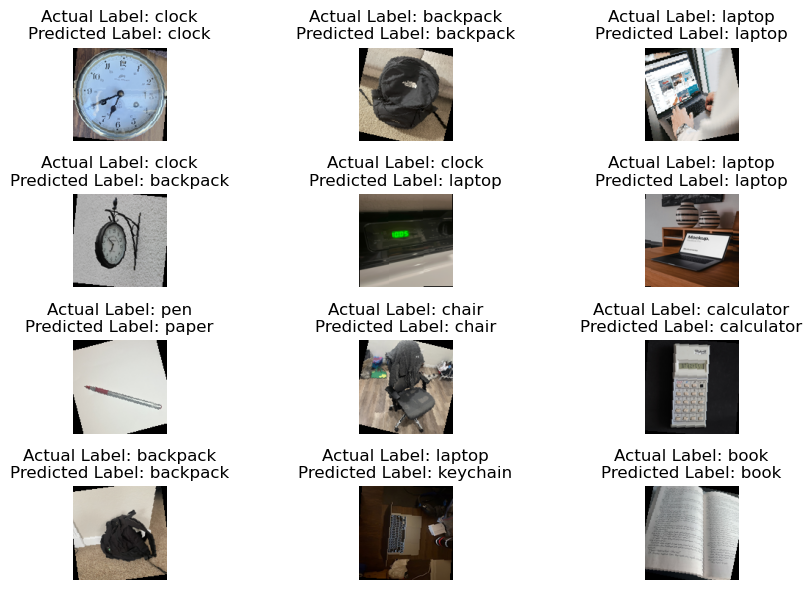

In [91]:
fig, axes = plt.subplots(4, 3, figsize=(10, 6))
for i in range(12):
    ax = axes[i // 3, i % 3]
    img = images[i].permute(1, 2, 0)
    img = img * 0.5 + 0.5  # unnormalize from [-1, 1] → [0, 1]
    ax.imshow(img)
    ax.set_title(f"Actual Label: {class_names[labels[i]]}\nPredicted Label: {class_names[predicted[i]]}")
    ax.axis("off")

plt.tight_layout()
plt.show()